# Exploratory Data Analysis - Fake and Real News Datasets

In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Importing the datasets

In [62]:
fake_df = pd.read_csv('../data/Fake.csv')
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [63]:
true_df = pd.read_csv('../data/True.csv')
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


### Some sample texts

In [79]:
from random import randint
# Print 3 random samples of the text column from a dataframe 
def print_sample_texts(dataframe):
    for i in range(3):
        print(f"\nSample {i+1}:\n")
        print(dataframe.text[randint(0,len(dataframe))])

In [78]:
print_sample_texts(fake_df)


Sample 1:

Right-wing super troll and Breitbart.com contributor Milo Yiannopoulos has been banned from Twitter forever. The announcement comes from the social network after years of Yiannopoulos using the service to direct his followers to hound and harass people with racist, bigoted, and sexist threats.That ended on Tuesday.But this week he went far. According to Twitter, it was Yiannopoulos who led the harassment campaign against Ghostbusters actor Leslie Jones that inspired the SNL cast member s decision to leave Twitter. The tweets, many of which targeted Jones for being black and a woman, were the final straw for Twitter, which is taking steps to try to solve its harassment problem.According to the company, the permanent suspension isn t a matter of speech as much as a matter of behavior   specifically, a violation of Twitter s rules regarding the targeted abuse of specific users.Yiannopoulos and his rabid fan base went after Jones because they view her role in the all-female Gho

In [80]:
print_sample_texts(true_df)


Sample 1:

BEDMINSTER, N.J. (Reuters) - For President Donald Trump, this was the week when the real world began to intrude upon his presidency.  The violent clashes in Charlottesville, Virginia, between white nationalists and counter-protesters confronted Trump with perhaps the first true domestic crisis of his young administration. And to some, even within his own Republican Party, he came up short.  It followed days of blustery threats toward North Korea that rattled some Americans and unnerved allies. Both are the kinds of white-knuckle challenges that define presidents - and which Trump largely has avoided during the first months of his tenure.  As images of rising tensions and a deadly car rampage in Charlottesville filled TV screens nationwide, the president was criticized first for waiting too long to address the violence and then, when he did so, failing to explicitly condemn the white-supremacist marchers who ignited the melee. [nL2N1KY033] Marco Rubio, a Republican senator w

## Analysing text and title lengths (in characters)

In [64]:
# Get the character length of each value in a DataFrame Series
def get_lens(series):
    return series.apply(lambda x : len(x))

In [100]:
fake_df['title_chars'] = get_lens(fake_df.title)
true_df['title_chars'] = get_lens(true_df.title)

In [101]:
fake_df['text_chars'] = get_lens(fake_df.text)
true_df['text_chars'] = get_lens(true_df.text)

In [67]:
text_len_bins = np.arange(0,10000,250)

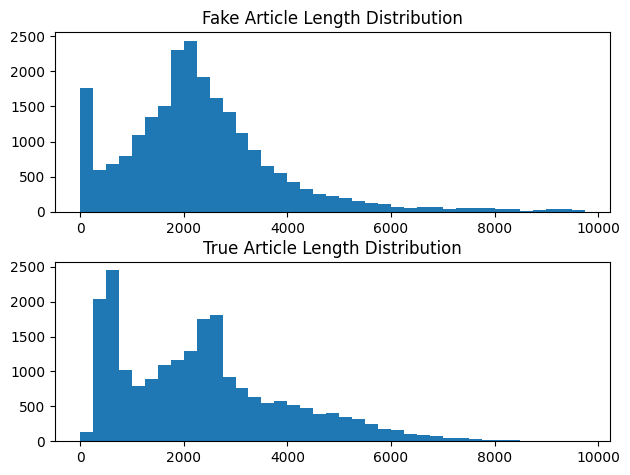

In [102]:
fig, axs = plt.subplots(2)
fig.tight_layout(pad=1.5)
axs[0].title.set_text("Fake Article Length Distribution")
axs[0].hist(fake_df.text_chars, bins=text_len_bins)
axs[1].title.set_text("True Article Length Distribution")
axs[1].hist(true_df.text_chars, bins=text_len_bins);

## Cleaning, tokenizing, and analyzing the words in text

In [95]:
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/joseph/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/joseph/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [133]:
remove_punctuation(fake_df.text).apply(lambda x : x.lower())

0        donald trump just couldn t wish all americans ...
1        house intelligence committee chairman devin nu...
2        on friday, it was revealed that former milwauk...
3        on christmas day, donald trump announced that ...
4        pope francis used his annual christmas day mes...
                               ...                        
23476    21st century wire says as 21wire reported earl...
23477    21st century wire says it s a familiar theme. ...
23478    patrick henningsen  21st century wireremember ...
23479    21st century wire says al jazeera america will...
23480    21st century wire says as 21wire predicted in ...
Name: text, Length: 23481, dtype: object

In [137]:
# removes all punctuation from a series of texts
def remove_punctuation(series):
    for punct in string.punctuation:
        new_series = series.apply(lambda x : x.replace(punct,""))
    return new_series

# makes all letters in a series of texts lowercase
def decapitalize(series):
    return series.apply(lambda x : x.lower())

In [103]:
# Tokenize a series of texts into lists of tokens
def tokenize_text(series):
    return series.apply(nltk.word_tokenize)

In [119]:
# Remove all stopwords from a list of tokens
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stopwords.words("english")]

In [138]:
# applies all text cleaning functions above to a series of texts and returns a DF containing clean text and the word count of the test
def clean_all_text(series):
    punct_series = remove_punctuation(series)
    lower_series = decapitalize(punct_series)
    token_series = tokenize_text(lower_series)
    word_count = token_series.apply(lambda x : len(x))
    new_series = token_series.apply(remove_stopwords)
    return pd.DataFrame({"text" : new_series, "word_count" : word_count})

In [ ]:
cleaned_fake_df = clean_all_text(fake_df.text)
cleaned_fake_df.head()